# Homework 04

## Denver Neighborhoods

## Goal

Identify (potential) outliers in a dataset. 

## Instructions 

During the discussions of activity 11 (Denver neighborhoods), the box plot below was generated where 5 data points can be spotted as (potential) outliers. Your goal is to write a program that identifies the name of the neighborhoods associated with those 5 data points. Hint: use the 'whisker' key to query the box plot returned dictionary to find the whiskers lower and upper bounds. 

![](files/boxplot.png)

Expected output of your program: 

```
Hilltop has homes priced much higher compared to others.
Country Club has homes priced much higher compared to others.
Was. Park has homes priced much higher compared to others.
Hampden is much more populated compared to the others.
Virginia Village has a school score average much lower compared to others.
```

In [1]:
import csv
import os
import matplotlib.pyplot as plt
import re
import numpy as np


In [2]:
DATA_FOLDER = 'data'
CSV_FILE_NAME = '/content/denver_neighborhoods.csv'

Hilltop has home_price much higher compared to others
Country Club has home_price much higher compared to others
Was. Park has home_price much higher compared to others
Hampden has population much higher compared to others
Virginia Village has schools_score average much lower compared to others


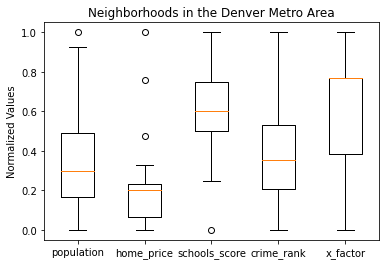

In [3]:
# Google drive mount
# drive.mount('/content/drive')
def exists(list, i):
    if len(list) == 0:
        return False
    return (0 <= i < len(list))


def min_max(data, mins, maxs, interval=(0, 1)):
    return [
        int(((data[i] - mins[i]) / (maxs[i] - mins[i]) * (interval[1] - interval[0]) + interval[0]) * 100000) / 100000
        for i in range(len(data))]


# TODOd: finish the scraper
if __name__ == "__main__":

    matrix = []
    neighborhoods = []
    headers = []
    with open(os.path.join(DATA_FOLDER, CSV_FILE_NAME), 'rt') as csv_file:
        reader = csv.reader(csv_file)
        row_count = 0
        for row in reader:
            row_count += 1
            if row_count == 1:
                headers = row
                continue
            row[0] = re.sub('Washington', 'Was.', row[0])
            row[0] = re.sub('South', 'S.', row[0])
            neighborhoods.append(row[0])
            data = [int(row[1]), int(row[2]), float(row[3]), int(row[4]), float(row[5])]
            if row_count == 2:
                mins = list(data)
                maxs = list(data)
            else:
                for i in range(len(data)):
                    mins[i] = min(mins[i], data[i])
                    maxs[i] = max(maxs[i], data[i])
            matrix.append(data)

    # print(mins)
    # print(maxs)
    matrix = [min_max(data, mins, maxs) for data in matrix]
    # print(matrix)

    columns = [[], [], [], [], []]
    for data in matrix:
        for i in range(5):
            columns[i].append(data[i])
    bp = plt.boxplot(columns)
    axes = plt.gca()
    labels = []
    for i in range(1, len(headers)):
        labels.append(headers[i])

    axes.set_xticklabels(labels)
    plt.title('Neighborhoods in the Denver Metro Area')
    plt.ylabel('Normalized Values')

    # TODOd: evaluate outliers in population
    outlier_ranges = []
    i = 0
    for whisker in bp['whiskers']:
        whiskerXY = whisker.get_xydata()

        if not exists(outlier_ranges, i):
            outlier_ranges.append([whiskerXY[1][1]])
        else:
            outlier_ranges[i].append(whiskerXY[1][1])
            i += 1

    for i in range(len(matrix)):
        row = matrix[i]
        names = neighborhoods[i]

        for k in range(len(outlier_ranges)):

            if (row[k] < outlier_ranges[k][0]):
                print(names + " has " + headers[k + 1] + " average much lower compared to others")
            if (row[k] > outlier_ranges[k][1]):
                print(names + " has " + headers[k + 1] + " much higher compared to others")

    plt.show()
